In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Phishing Websites Preprocessed.csv')

<ipython-input-2-5992223767e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="Set2")


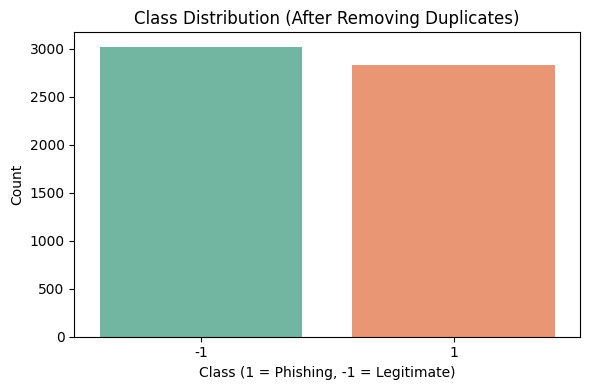

In [2]:
# Count of each class
class_counts = df['target'].value_counts()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="Set2")
plt.title("Class Distribution (After Removing Duplicates)")
plt.xlabel("Class (1 = Phishing, -1 = Legitimate)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

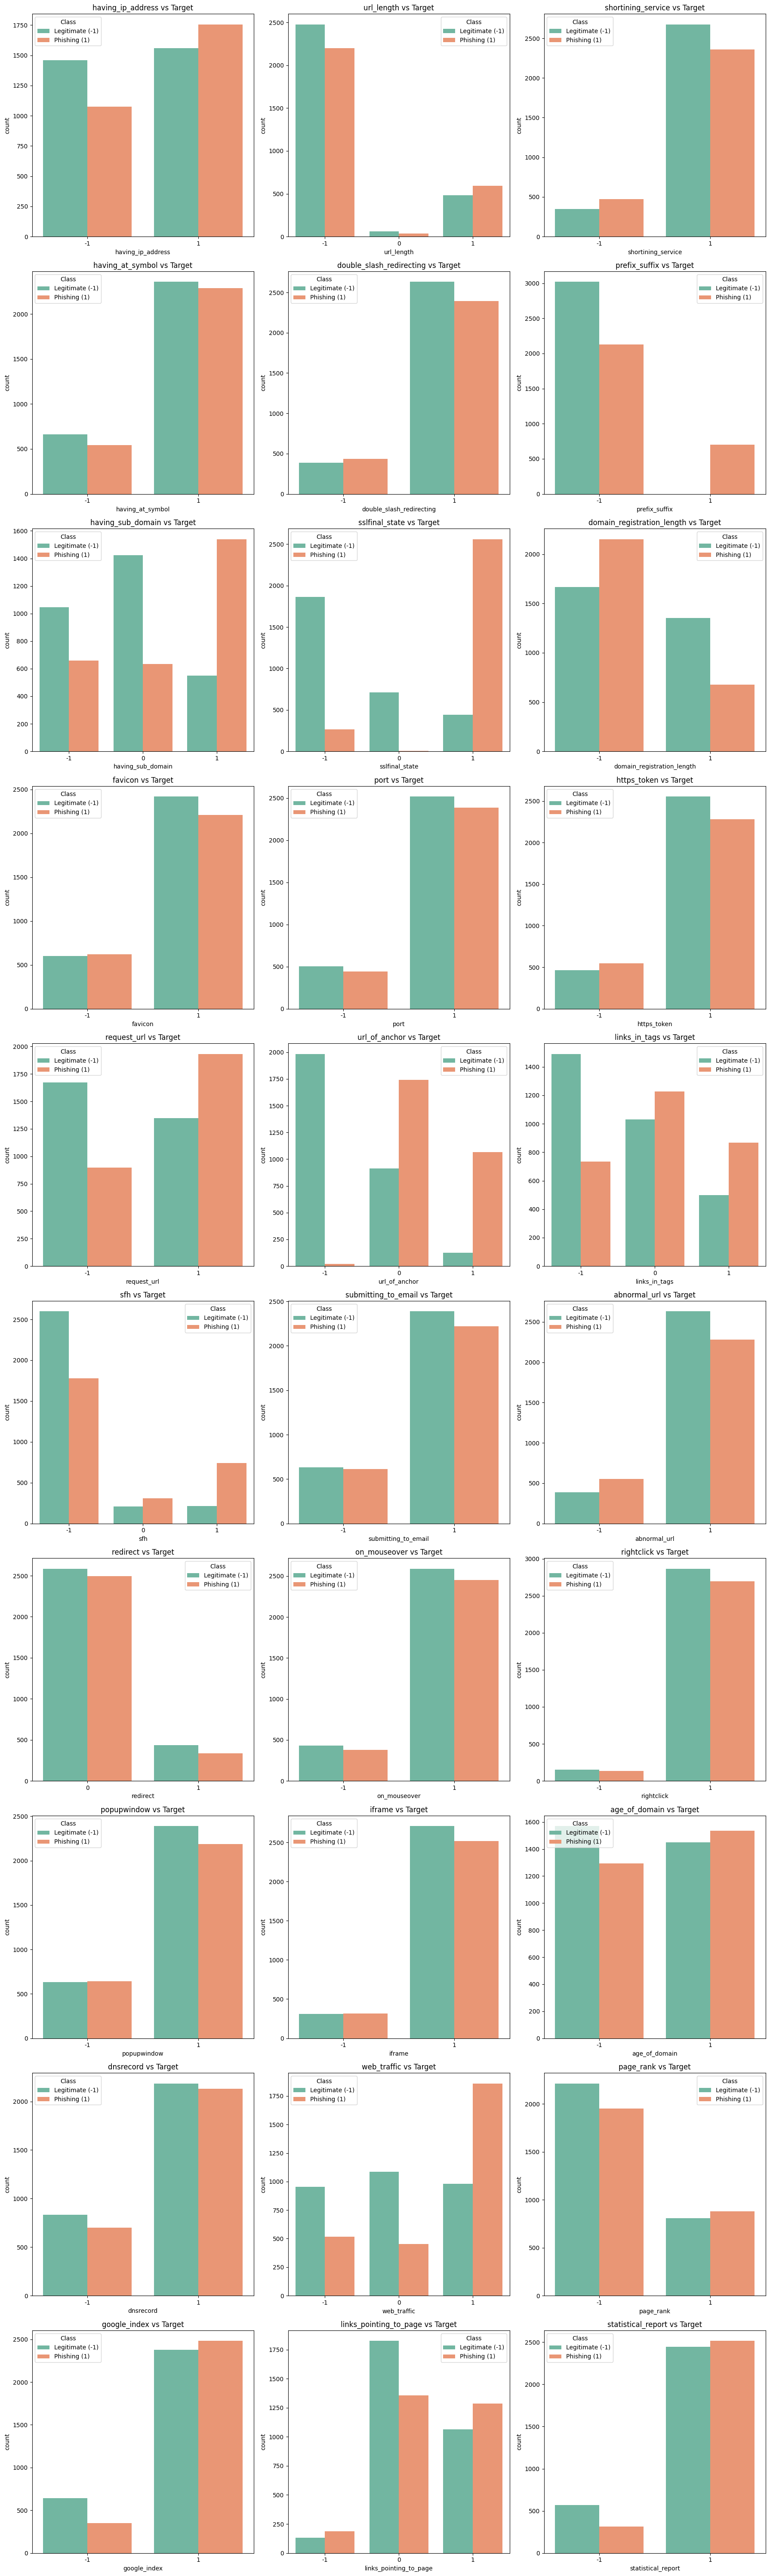

In [3]:
selected_features = df.select_dtypes(include=['number']).columns.drop('target')

num_features = len(selected_features)
num_cols = 3  # You can adjust this
num_rows = (num_features + num_cols - 1) // num_cols

# Plot distribution of selected features by class
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    # Access the column using df[feature]
    # Check if the column exists in the DataFrame
    if feature in df.columns:
        sns.countplot(x=feature, hue='target', data=df, palette='Set2', ax=axes[i])
        axes[i].set_title(f"{feature} vs Target")
        axes[i].legend(title='Class', labels=['Legitimate (-1)', 'Phishing (1)'])
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame.")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

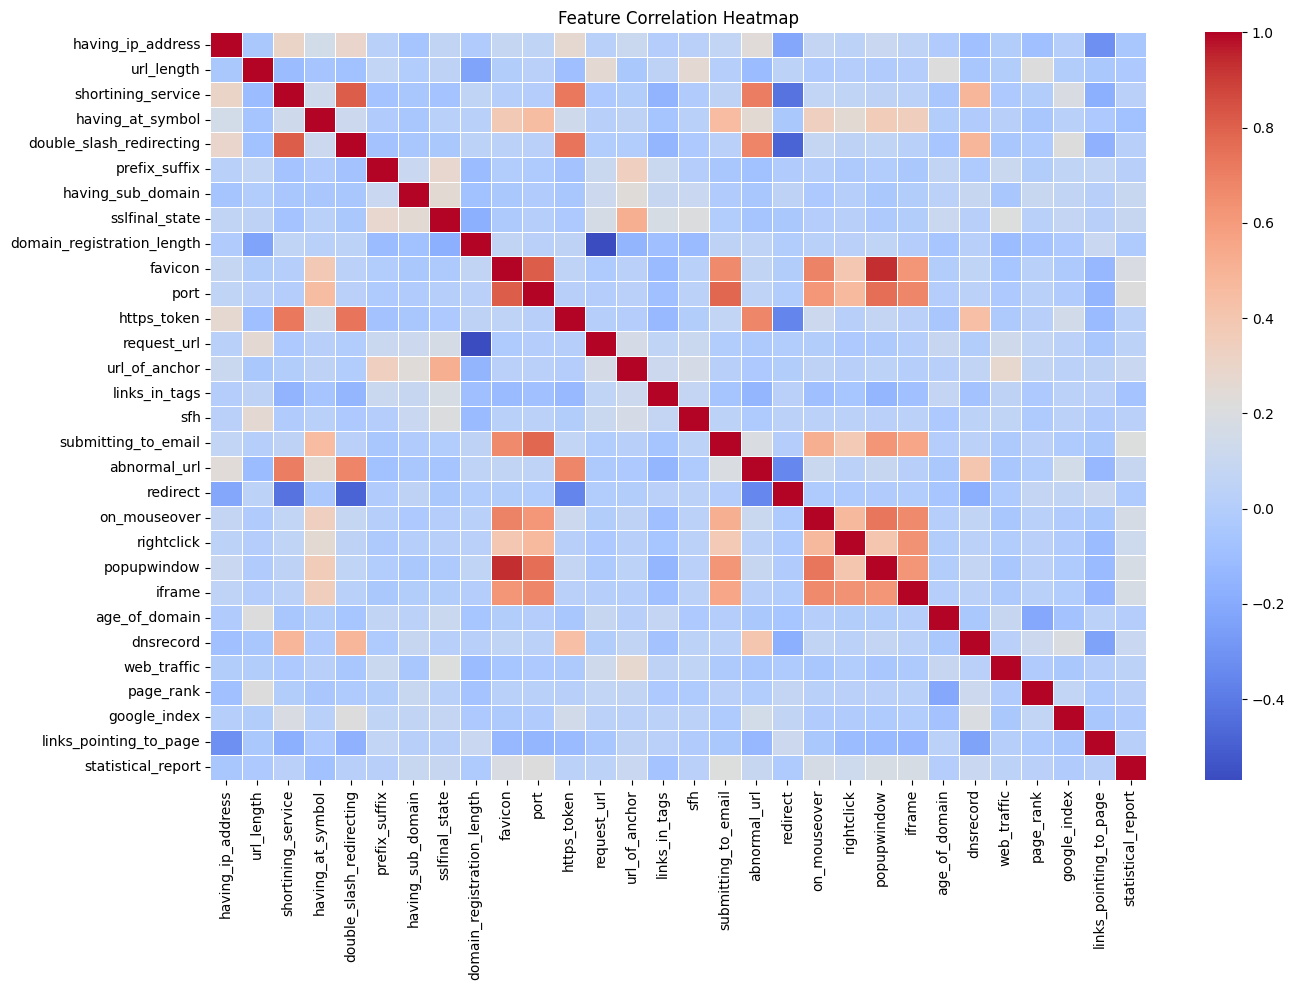

In [4]:
correlation_matrix = df.drop(columns='target').apply(pd.to_numeric, errors='coerce').corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

<ipython-input-5-3690d6bd83b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], ax=axes[i], palette="Set2")  # Use 'palette' for consistent style
<ipython-input-5-3690d6bd83b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], ax=axes[i], palette="Set2")  # Use 'palette' for consistent style
<ipython-input-5-3690d6bd83b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], ax=axes[i], palette="Set2")  # Use 'palette' for consistent style
<ipython-input-5-3690d6bd83b7>:15: FutureWarning: 

Passing `

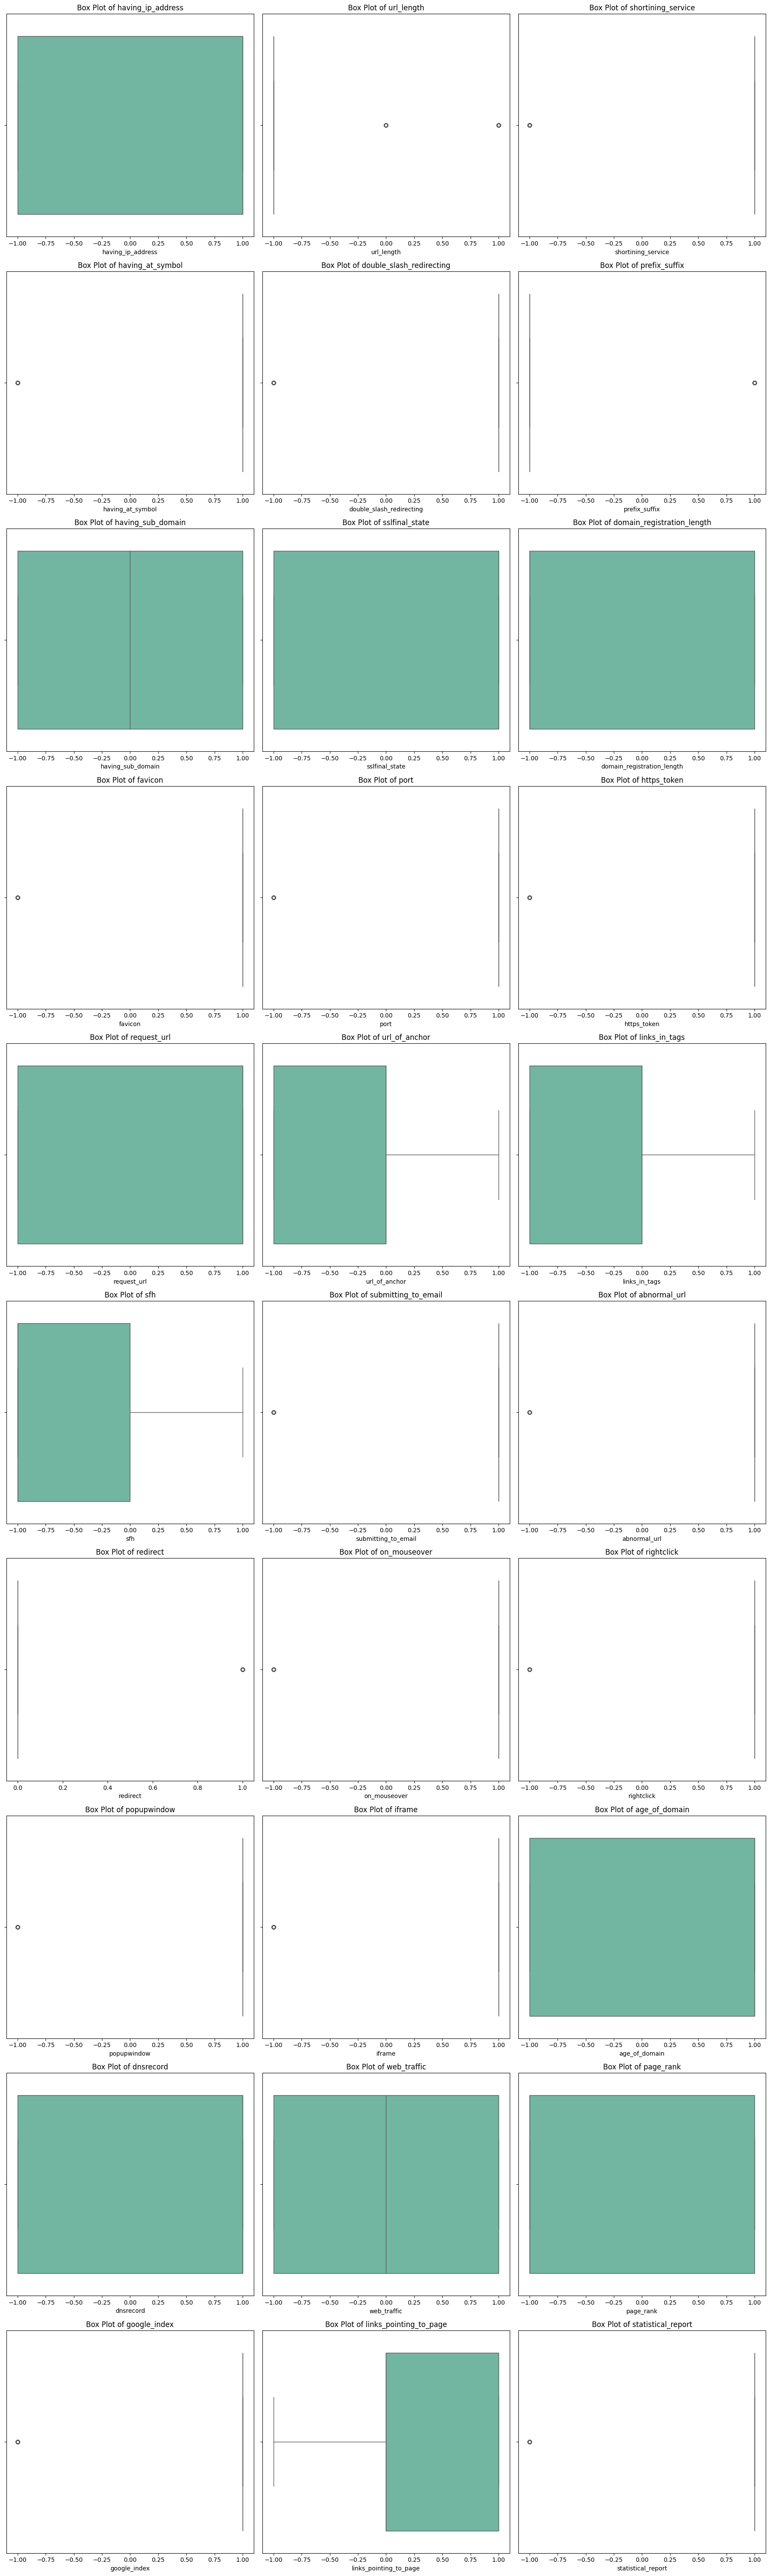

In [5]:
# Assuming 'selected_features' contains the features you want to plot
selected_features = df.select_dtypes(include=['number']).columns.drop('target')

# Calculate the number of rows and columns for subplots
num_features = len(selected_features)
num_cols = 3  # You can adjust this
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()  # Flatten for easier iteration

# Loop through features and create box plots
for i, feature in enumerate(selected_features):
    sns.boxplot(x=df[feature], ax=axes[i], palette="Set2")  # Use 'palette' for consistent style
    axes[i].set_title(f"Box Plot of {feature}")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()